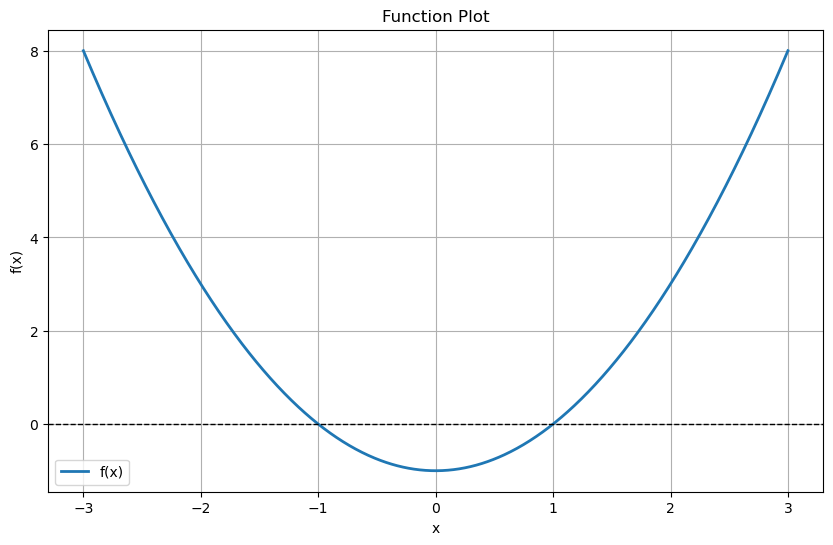

Enter an initial guess for Newton's Method:  0.66
Enter the left endpoint for the Bisection Method:  -0.2
Enter the right endpoint for the Bisection Method:  1.5


Newton's Method: Root = 1.000000, Iterations = 5
Bisection Method: Root = 1.000000, Iterations = 20


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mathematical function
def f(x):
    return x**2 - 1 # Example function (replace as needed)

# Numerical derivative approximation
def numerical_derivative(f, x, h=1e-5):
    """
    Approximate the derivative of f at x using the symmetric difference method.
    :param f: Function to differentiate
    :param x: Point at which to evaluate the derivative
    :param h: Step size for numerical differentiation
    :return: Approximated derivative at x
    """
    return (f(x + h) - f(x - h)) / (2 * h)

# Newton's Method Implementation
def newton_method(f, x0, tol=1e-6, max_iter=100):
    """
    Find a root using Newton's method with numerical derivative.
    :param f: Function for which the root is sought
    :param x0: Initial guess
    :param tol: Tolerance for convergence
    :param max_iter: Maximum number of iterations
    :return: The root and the number of iterations
    """
    x = x0
    for i in range(max_iter):
        fx = f(x)
        fpx = numerical_derivative(f, x)
        if abs(fpx) < tol:
            raise ValueError("Derivative near zero. Newton's method fails.")
        x_new = x - fx / fpx
        if abs(x_new - x) < tol:
            return x_new, i + 1
        x = x_new
    raise ValueError("Maximum iterations exceeded.")

# Bisection Method Implementation
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    """
    Find a root using the Bisection method.
    :param f: Function for which the root is sought
    :param a: Left endpoint of the interval
    :param b: Right endpoint of the interval
    :param tol: Tolerance for convergence
    :param max_iter: Maximum number of iterations
    :return: The root and the number of iterations
    """
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs.")
    for i in range(max_iter):
        c = (a + b) / 2
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            return c, i + 1
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    raise ValueError("Maximum iterations exceeded.")

# Function to plot the given mathematical function
def plot_function(f, x_min, x_max, points=1000):
    """
    Plot the function f over the range [x_min, x_max].
    :param f: Function to plot
    :param x_min: Minimum x value
    :param x_max: Maximum x value
    :param points: Number of points to use for the plot
    """
    x = np.linspace(x_min, x_max, points)
    y = f(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label="f(x)", linewidth=2)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)  # X-axis
    plt.title("Function Plot")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
    plt.legend()
    plt.show()

# Main Program
if __name__ == "__main__":
    # Plot the function to help estimate initial guesses and intervals
    x_min, x_max = -3, 3  # Range for visualization
    plot_function(f, x_min, x_max)

    # User-defined initial parameters
    x0_newton = float(input("Enter an initial guess for Newton's Method: "))
    a_bisection = float(input("Enter the left endpoint for the Bisection Method: "))
    b_bisection = float(input("Enter the right endpoint for the Bisection Method: "))

    # Run Newton's Method
    try:
        root_newton, iter_newton = newton_method(f, x0_newton)
        print(f"Newton's Method: Root = {root_newton:.6f}, Iterations = {iter_newton}")
    except ValueError as e:
        print(f"Newton's Method Error: {e}")

    # Run Bisection Method
    try:
        root_bisection, iter_bisection = bisection_method(f, a_bisection, b_bisection)
        print(f"Bisection Method: Root = {root_bisection:.6f}, Iterations = {iter_bisection}")
    except ValueError as e:
        print(f"Bisection Method Error: {e}")
